In [191]:
using XLSX, DataFrames, TimeSeries
using StatsBase
using Plots, StatsPlots
using LinearAlgebra
include("utils.jl")
include("hmm_est.jl")

print_percentiles (generic function with 1 method)

In [319]:
data = DataFrame(XLSX.readtable("assets_data_03.24.xlsx", "Indexes_1988"; infer_eltypes=true))
data = TimeArray(data,timestamp=:Date)
returns = percentchange(from(data,Date(1987,12,1)),:log)
returns_summarystats(returns,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net,0.153673,1.39485,0.0746963,0.396944,-2.65001,-0.78637,-0.217796,0.0427574,1.94886,0.486073,0.14993
World_ex_USA,0.168245,1.71291,0.0543499,0.416495,-2.79862,-0.617123,-0.275179,0.0570642,1.60028,0.323041,0.0992184
USA_Net,0.149142,1.47878,0.100012,0.425381,-2.25697,-0.700867,-0.200442,0.00136587,1.37934,0.670583,0.153658
EM_Net,0.223929,2.08248,0.087656,0.556542,-4.10004,-0.893223,-0.313792,0.142223,3.10658,0.391445,0.122423
EUROPE _Net,0.174365,1.88541,0.0740363,0.481077,-2.86588,-0.653627,-0.28179,0.0599675,1.65719,0.424606,0.128409
PACIFIC_Net,0.203629,2.26165,0.0764489,0.480349,-3.45428,-0.672538,-0.23457,0.0630165,2.71617,0.375432,0.102782
JAPAN_Net,0.193966,2.60501,0.020917,0.475597,-2.58666,-0.0927252,-0.366448,0.0549465,1.10292,0.107839,0.0473537


In [320]:
cor_returns(returns)

,ACWI_Net,World_ex_USA,USA_Net,EM_Net,EUROPE _Net,PACIFIC_Net,JAPAN_Net
ACWI_Net,1.0,0.960715,0.912189,0.77575,0.920939,0.808688,0.725563
World_ex_USA,0.960715,1.0,0.776151,0.733124,0.933812,0.790075,0.807135
USA_Net,0.912189,0.776151,1.0,0.673709,0.803782,0.707141,0.500498
EM_Net,0.77575,0.733124,0.673709,1.0,0.69814,0.827589,0.513798
EUROPE _Net,0.920939,0.933812,0.803782,0.69814,1.0,0.76197,0.581619
PACIFIC_Net,0.808688,0.790075,0.707141,0.827589,0.76197,1.0,0.528712
JAPAN_Net,0.725563,0.807135,0.500498,0.513798,0.581619,0.528712,1.0


In [323]:
regime_data, likehood = hmm_est(returns[:USA_Net, :EM_Net, :EUROPE_Net, :JAPAN_Net, :PACIFIC_Net],2)
regime_summary(regime_data,["USA_Net", "EUROPE_Net", "EM_Net", "JAPAN_Net", "PACIFIC_Net"],12)

KeyError: KeyError: key :EUROPE_Net not found

In [324]:
println("Od 2003")
returns_summarystats(from(returns,Date(2003,01,01)),12)

Od 2003


,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net,0.156646,1.39485,0.085948,0.403633,-2.65001,-0.934317,-0.193784,0.094633,2.73636,0.548678,0.157103
World_ex_USA,0.168008,1.71291,0.0702421,0.397117,-2.79862,-0.851332,-0.229432,0.130675,2.61657,0.418089,0.146646
USA_Net,0.149363,1.47878,0.0984799,0.406468,-2.25697,-0.790878,-0.190503,0.0390688,1.89672,0.659333,0.153658
EM_Net,0.208671,1.89295,0.0841651,0.552997,-3.83713,-0.8236,-0.316873,0.139343,3.2059,0.403338,0.0995221
EUROPE _Net,0.18353,1.88541,0.0698612,0.489185,-2.86588,-0.690124,-0.310469,0.122059,1.95729,0.380653,0.134297
PACIFIC_Net,0.200809,1.68453,0.0848985,0.471324,-3.45428,-0.983775,-0.210658,0.0989698,3.48225,0.422783,0.123895
JAPAN_Net,0.153095,1.5119,0.0617025,0.417638,-1.91953,-0.403909,-0.215228,0.111605,0.959283,0.403035,0.0798017


In [325]:
cor_returns(from(returns,Date(2003,01,01)))

,ACWI_Net,World_ex_USA,USA_Net,EM_Net,EUROPE _Net,PACIFIC_Net,JAPAN_Net
ACWI_Net,1.0,0.973041,0.964474,0.8707,0.952702,0.899098,0.769088
World_ex_USA,0.973041,1.0,0.889128,0.872326,0.983725,0.910645,0.804302
USA_Net,0.964474,0.889128,1.0,0.750178,0.8734,0.802269,0.6942
EM_Net,0.8707,0.872326,0.750178,1.0,0.829879,0.911497,0.687452
EUROPE _Net,0.952702,0.983725,0.8734,0.829879,1.0,0.867371,0.711975
PACIFIC_Net,0.899098,0.910645,0.802269,0.911497,0.867371,1.0,0.687335
JAPAN_Net,0.769088,0.804302,0.6942,0.687452,0.711975,0.687335,1.0


In [326]:
println("Od 1998")
returns_summarystats(from(returns,Date(1988,01,01)),12)

Od 1998


,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net,0.153673,1.39485,0.0746963,0.396944,-2.65001,-0.78637,-0.217796,0.0427574,1.94886,0.486073,0.14993
World_ex_USA,0.168245,1.71291,0.0543499,0.416495,-2.79862,-0.617123,-0.275179,0.0570642,1.60028,0.323041,0.0992184
USA_Net,0.149142,1.47878,0.100012,0.425381,-2.25697,-0.700867,-0.200442,0.00136587,1.37934,0.670583,0.153658
EM_Net,0.223929,2.08248,0.087656,0.556542,-4.10004,-0.893223,-0.313792,0.142223,3.10658,0.391445,0.122423
EUROPE _Net,0.174365,1.88541,0.0740363,0.481077,-2.86588,-0.653627,-0.28179,0.0599675,1.65719,0.424606,0.128409
PACIFIC_Net,0.203629,2.26165,0.0764489,0.480349,-3.45428,-0.672538,-0.23457,0.0630165,2.71617,0.375432,0.102782
JAPAN_Net,0.193966,2.60501,0.020917,0.475597,-2.58666,-0.0927252,-0.366448,0.0549465,1.10292,0.107839,0.0473537


In [327]:
cor_returns(from(returns,Date(1988,01,01)))

,ACWI_Net,World_ex_USA,USA_Net,EM_Net,EUROPE _Net,PACIFIC_Net,JAPAN_Net
ACWI_Net,1.0,0.960715,0.912189,0.77575,0.920939,0.808688,0.725563
World_ex_USA,0.960715,1.0,0.776151,0.733124,0.933812,0.790075,0.807135
USA_Net,0.912189,0.776151,1.0,0.673709,0.803782,0.707141,0.500498
EM_Net,0.77575,0.733124,0.673709,1.0,0.69814,0.827589,0.513798
EUROPE _Net,0.920939,0.933812,0.803782,0.69814,1.0,0.76197,0.581619
PACIFIC_Net,0.808688,0.790075,0.707141,0.827589,0.76197,1.0,0.528712
JAPAN_Net,0.725563,0.807135,0.500498,0.513798,0.581619,0.528712,1.0


In [341]:
data = DataFrame(XLSX.readtable("assets_data_03.24.xlsx", "Indexes_PLN";infer_eltypes=true))
data = TimeArray(data,timestamp=:Date)
returns = percentchange(data,:log)
returns_summarystats(returns,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net_PLN,0.131882,1.27136,0.0697841,0.388241,-1.34382,-0.511507,-0.191836,0.0725772,0.529017,0.52914,0.0948534
World_ex_USA,0.127673,1.08781,0.0563719,0.367298,-1.30699,-0.605534,-0.154251,0.116578,0.652877,0.441533,0.0794012
USA_Net,0.147417,1.52892,0.0817992,0.451821,-1.41286,-0.271624,-0.246748,0.0325682,0.321847,0.554884,0.111575
EM_Net,0.180619,1.63399,0.0634281,0.395654,-3.23025,-0.925559,-0.23949,0.116884,2.92841,0.35117,0.11645
EUROPE_Net,0.135004,1.26031,0.0569752,0.37966,-1.63772,-0.674076,-0.189226,0.0883948,0.896962,0.422026,0.101564
PACIFIC_Net,0.164869,1.71623,0.0714554,0.412164,-2.08606,-0.468938,-0.242087,0.057801,1.25617,0.433407,0.0880434
JAPAN_Net,0.162668,1.71003,0.0448639,0.431871,-1.74427,-0.0399027,-0.303586,0.115097,0.0896495,0.275801,0.0562378
MwigTR,0.23081,2.40303,0.0965959,0.512547,-4.38081,-1.04335,-0.320635,0.124733,5.12426,0.418508,0.152243
WIGTR,0.250436,2.48239,0.0550865,0.595631,-4.43389,-0.536226,-0.423476,-0.00315629,2.44325,0.219963,0.0887569
sWIGTR,0.238295,2.97937,0.102918,0.506286,-3.8769,-0.0601264,-0.349981,0.367852,2.80981,0.431893,0.0574102


In [329]:
cor_returns(returns)

,ACWI_Net_PLN,World_ex_USA,USA_Net,EM_Net,EUROPE_Net,PACIFIC_Net,JAPAN_Net,MwigTR,WIGTR,sWIGTR
ACWI_Net_PLN,1.0,0.946257,0.957664,0.725927,0.890318,0.764676,0.688762,0.42426,0.350972,0.358028
World_ex_USA,0.946257,1.0,0.828033,0.710293,0.956383,0.778784,0.727219,0.444575,0.391389,0.407999
USA_Net,0.957664,0.828033,1.0,0.589134,0.773901,0.643892,0.617744,0.337011,0.247079,0.25099
EM_Net,0.725927,0.710293,0.589134,1.0,0.633194,0.818558,0.476692,0.539632,0.520138,0.490026
EUROPE_Net,0.890318,0.956383,0.773901,0.633194,1.0,0.687348,0.528782,0.465509,0.428935,0.439101
PACIFIC_Net,0.764676,0.778784,0.643892,0.818558,0.687348,1.0,0.51346,0.450851,0.406806,0.39272
JAPAN_Net,0.688762,0.727219,0.617744,0.476692,0.528782,0.51346,1.0,0.181849,0.112797,0.150526
MwigTR,0.42426,0.444575,0.337011,0.539632,0.465509,0.450851,0.181849,1.0,0.806089,0.798883
WIGTR,0.350972,0.391389,0.247079,0.520138,0.428935,0.406806,0.112797,0.806089,1.0,0.664624
sWIGTR,0.358028,0.407999,0.25099,0.490026,0.439101,0.39272,0.150526,0.798883,0.664624,1.0


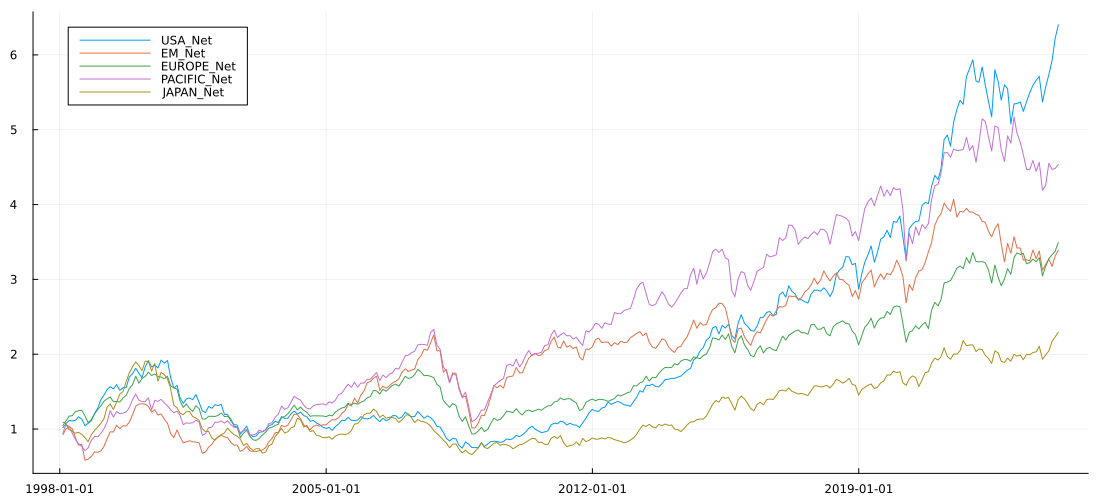

In [330]:
gr()
plot(cumprod(returns[:USA_Net, :EM_Net, :EUROPE_Net, :PACIFIC_Net, :JAPAN_Net] .+ 1, dims=1), size=(1100,500))

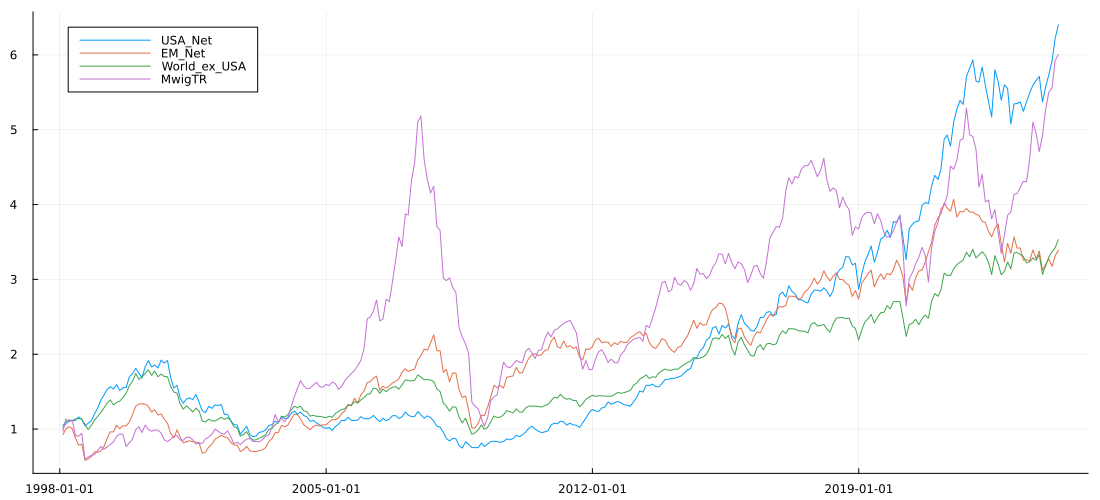

In [331]:
gr()
plot(cumprod(returns[:USA_Net, :EM_Net, :World_ex_USA,  :MwigTR] .+ 1, dims=1),size=(1100,500))


In [332]:
regime_data, likehood = hmm_est(returns[:USA_Net, :EM_Net, :EUROPE_Net, :JAPAN_Net, :PACIFIC_Net],2)
regime_summary(regime_data,["USA_Net", "EUROPE_Net", "EM_Net", "JAPAN_Net", "PACIFIC_Net"],12)

Means
Standard deviations
Regimes transition matrix


Regime,USA_Net,EUROPE_Net,EM_Net,JAPAN_Net,PACIFIC_Net
1,0.148,0.123,0.122,0.086,0.124
2,-0.010,-0.018,-0.032,-0.012,-0.002


Regime,USA_Net,EUROPE_Net,EM_Net,JAPAN_Net,PACIFIC_Net
1,0.122,0.107,0.102,0.122,0.108
2,0.173,0.246,0.167,0.205,0.219


"Correlations in regime 1"

,USA_Net,EUROPE_Net,EM_Net,JAPAN_Net,PACIFIC_Net
USA_Net,1.000,0.453,0.704,0.758,0.618
EUROPE_Net,0.453,1.000,0.479,0.514,0.750
EM_Net,0.704,0.479,1.000,0.574,0.682
JAPAN_Net,0.758,0.514,0.574,1.000,0.555
PACIFIC_Net,0.618,0.750,0.682,0.555,1.000


"Correlations in regime 2"

,USA_Net,EUROPE_Net,EM_Net,JAPAN_Net,PACIFIC_Net
USA_Net,1.000,0.659,0.810,0.534,0.662
EUROPE_Net,0.659,1.000,0.692,0.463,0.837
EM_Net,0.810,0.692,1.000,0.499,0.688
JAPAN_Net,0.534,0.463,0.499,1.000,0.493
PACIFIC_Net,0.662,0.837,0.688,0.493,1.000


Regime,1,2
1,0.880,0.120
2,0.173,0.827


In [342]:
returns_summarystats(from(returns,Date(2003,01,01)),12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net_PLN,0.121009,1.27136,0.0878896,0.359616,-1.24764,-0.324141,-0.169791,0.0110852,0.676664,0.726307,0.0957055
World_ex_USA,0.118843,1.08781,0.0721838,0.337543,-1.22696,-0.502286,-0.122136,0.0573248,1.00082,0.607389,0.0787277
USA_Net,0.134722,1.52892,0.100422,0.417782,-1.2983,0.00510971,-0.236136,-0.0139901,0.333539,0.7454,0.103342
EM_Net,0.15457,1.33234,0.0861067,0.376608,-2.26546,-0.694623,-0.196137,0.0823395,1.85576,0.557072,0.118377
EUROPE_Net,0.125453,1.26031,0.0718029,0.363983,-1.39762,-0.546058,-0.162308,0.0539266,0.999747,0.572349,0.101943
PACIFIC_Net,0.150038,1.38043,0.0868402,0.410659,-2.08606,-0.69371,-0.179361,0.0375466,1.74723,0.578789,0.10926
JAPAN_Net,0.147748,1.51953,0.0636442,0.414741,-1.28508,0.0363747,-0.250906,0.0555729,0.0129872,0.430761,0.0815546
MwigTR,0.218083,2.40303,0.115488,0.483487,-3.88981,-0.662784,-0.299328,0.195206,3.74428,0.52956,0.147483
WIGTR,0.219887,2.25936,0.070473,0.593968,-3.20194,-0.364495,-0.404703,0.00871093,1.09445,0.320496,0.114368
sWIGTR,0.224443,2.97937,0.161966,0.566093,-3.05751,0.320421,-0.311586,0.330382,1.7798,0.721637,0.101625


In [343]:
cor_returns(from(returns,Date(2003,01,01)))

,ACWI_Net_PLN,World_ex_USA,USA_Net,EM_Net,EUROPE_Net,PACIFIC_Net,JAPAN_Net,MwigTR,WIGTR,sWIGTR
ACWI_Net_PLN,1.0,0.946339,0.953154,0.731793,0.887274,0.794678,0.709911,0.450716,0.334152,0.372553
World_ex_USA,0.946339,1.0,0.823244,0.746071,0.959727,0.828051,0.73079,0.509227,0.404278,0.438515
USA_Net,0.953154,0.823244,1.0,0.551088,0.762671,0.646932,0.652611,0.329099,0.206086,0.249567
EM_Net,0.731793,0.746071,0.551088,1.0,0.669578,0.839199,0.496184,0.507574,0.473624,0.472092
EUROPE_Net,0.887274,0.959727,0.762671,0.669578,1.0,0.748439,0.551812,0.554874,0.458922,0.484214
PACIFIC_Net,0.794678,0.828051,0.646932,0.839199,0.748439,1.0,0.515158,0.465087,0.404421,0.409704
JAPAN_Net,0.709911,0.73079,0.652611,0.496184,0.551812,0.515158,1.0,0.191067,0.0965275,0.148704
MwigTR,0.450716,0.509227,0.329099,0.507574,0.554874,0.465087,0.191067,1.0,0.813257,0.867237
WIGTR,0.334152,0.404278,0.206086,0.473624,0.458922,0.404421,0.0965275,0.813257,1.0,0.69489
sWIGTR,0.372553,0.438515,0.249567,0.472092,0.484214,0.409704,0.148704,0.867237,0.69489,1.0


In [333]:
regime_data_n = HMM([1.0,0],transition_matrix(regime_data), obs_distributions(regime_data))

Hidden Markov Model with:
 - initialization: [1.0, 0.0]
 - transition matrix: [0.8798946115635975 0.12010538843640246; 0.17271628365663047 0.8272837163433696]
 - observation distributions: [FullNormal(
dim: 5
μ: [0.012369786281159185, 0.010208413215960572, 0.010127395182278896, 0.0071406323528639005, 0.010363481540715222]
Σ: [0.001242681817702807 0.0004929810858705958 0.0007294910855470522 0.0009385990991917911 0.0006767782300913781; 0.0004929810858705958 0.0009544869244025719 0.00043467263004242805 0.000557359880477943 0.0007198903039672475; 0.0007294910855470522 0.00043467263004242805 0.0008640745725179382 0.0005926236094311384 0.0006227538103825555; 0.0009385990991917911 0.000557359880477943 0.0005926236094311384 0.0012338831986165512 0.0006049142296998591; 0.0006767782300913781 0.0007198903039672475 0.0006227538103825555 0.0006049142296998591 0.0009644457039317991]
)
, FullNormal(
dim: 5
μ: [-0.0008691738296380187, -0.0015275422133836027, -0.0026973992088768573, -0.0009697682720488

In [334]:
include("hmm_est.jl")

simulations = simulate_hmm(regime_data_n,5, 120,100000)

simulations

5×100000×120 Array{Float64, 3}:
[:, :, 1] =
  0.056692     0.0236217   0.0158064   …  0.0475889    0.0662126   0.0321168
 -0.0109799    0.0234574   0.0187629      0.0489278   -0.0210569  -0.0202746
 -0.00692207  -0.00555128  0.0136908      0.011203     0.0526282  -0.0115512
  0.0142037    0.0284948   0.0195744      0.00391313   0.0495181  -0.00995331
 -0.0104543   -0.00437278  0.00875031     0.0368352    0.0455828   0.0171445

[:, :, 2] =
 -0.0106476  -0.00500792  0.020446    0.0478403   …   0.0177118    0.0228667
  0.0261503   0.0032605   0.032676    0.00599849      0.008259     0.0111853
 -0.0305518   0.0295468   0.0627987   0.047767        0.00806966   0.0270172
  0.0356592  -0.0331507   0.00962263  0.036405       -0.0124547   -0.0135134
  0.0124473   0.0200123   0.0463184   0.0168297       0.0382901    0.059899

[:, :, 3] =
 0.0476345  -0.0248481    0.00811428  …   0.0115184    0.0148968
 0.14165    -0.00303385  -0.00144851      0.00934928   0.0704508
 0.111292   -0.015353     0.00

In [302]:
sum([0.4885, 0.2704, 0.1284, 0.0826, 0.0301])

0.9999999999999999

In [340]:
weights = [0.654, 0.168, 0.091, 0.061, 0.026]
weights_98 = [0.4885, 0.2704, 0.1284, 0.0826, 0.0301]

prices = weights_98 * 100

cumres = cumprod(simulations .+1,dims=3)

rand_price = prices .* cumres

acwi_agg = sum(rand_price, dims=1)[1,:,:]

100000×120 Matrix{Float64}:
 102.469   102.565   111.288   111.819   …  296.97    318.632   310.288
 101.939   101.935   100.148   106.862      119.299   128.442   135.693
 101.643   104.597   104.926   105.483      301.595   305.694   314.519
  99.7472  103.181   101.992   100.463      204.369   215.689   233.999
  98.7187  100.73    100.706    97.6124     152.399   154.593   144.816
  98.7515   98.5938   97.8568  102.652   …  212.273   221.236   227.604
 100.047   100.32    102.913    97.9065     327.417   327.013   345.643
  97.6469   97.9876   98.4184   94.1945     227.954   210.577   196.384
  99.4586   99.6748  102.747   104.662       61.0406   62.5773   61.128
 105.352   109.311   110.825   106.059       86.5125   84.2204   79.9464
   ⋮                                     ⋱                      
 103.394   111.165   127.906   128.681       93.4385   93.6529   91.3876
  99.2503  100.158    97.752    98.2933     179.614   185.426   177.399
 106.803   106.229   102.538   105.358   

In [336]:
acwi_agg_year = hcat(fill(100,100000),acwi_agg[:,1:12:end])

100000×11 Matrix{Float64}:
 100.0  102.469   137.199   146.432   …  311.367   310.477   344.168
 100.0  101.939   109.545   131.528      104.264   117.928   108.155
 100.0  101.643   109.444   107.257      208.733   313.668   297.689
 100.0   99.7472  107.17    101.25       186.174   173.314   187.665
 100.0   98.7187  120.969   115.187      123.501   140.452   133.304
 100.0   98.7515  114.409   114.427   …  163.113   178.359   216.085
 100.0  100.047   106.836   144.079      280.169   293.884   326.322
 100.0   97.6469  113.508   123.414      215.867   267.999   225.246
 100.0   99.4586  120.495   123.745       73.1094   82.7573   65.2524
 100.0  105.352    91.7484   95.4691      65.736    78.3099   95.0447
   ⋮                                  ⋱                        ⋮
 100.0  103.394   132.797   118.229      139.703   126.39    102.539
 100.0   99.2503  119.029   121.38       175.761   239.049   233.79
 100.0  106.803   139.353   147.539      201.223   226.313   213.328
 100.0   9

In [337]:
acwi_agg_year_ret = acwi_agg_year[:,2:end]./acwi_agg_year[:,1:end-1] .- 1


100000×10 Matrix{Float64}:
  0.0246948     0.338926   …   0.184165   -0.00285924   0.108512
  0.0193913     0.0746076     -0.0483023   0.131043    -0.0828679
  0.016433      0.076741       0.1949      0.502724    -0.0509432
 -0.00252806    0.0744196      0.303768   -0.0690725    0.0828024
 -0.0128128     0.225389      -0.065069    0.13725     -0.0508896
 -0.0124852     0.158556   …   0.522666    0.0934677    0.211518
  0.000468895   0.0678573      0.205394    0.0489556    0.110376
 -0.0235314     0.162434       0.0198693   0.241499    -0.159526
 -0.00541408    0.211505      -0.28591     0.131965    -0.211521
  0.053518     -0.129123      -0.193659    0.19128      0.213699
  ⋮                        ⋱                           
  0.0339351     0.284387       0.456055   -0.0952957   -0.188713
 -0.00749653    0.199278      -0.0604203   0.360082    -0.0219982
  0.068025      0.304769      -0.0705869   0.124684    -0.057375
 -0.00760343    0.0278609      0.0382391  -0.171733     0.137488
 -

In [338]:
print_percentiles(acwi_agg_year_ret,[0.05, 0.25, 0.5, 0.75, 0.95])

,1,2,3,4,5,6,7,8,9,10
0.05,-0.0353902,-0.145652,-0.167955,-0.168908,-0.168814,-0.167638,-0.167982,-0.165582,-0.16831,-0.167094
0.25,-0.00781282,-0.00769804,-0.0243363,-0.024799,-0.025341,-0.0237011,-0.0245085,-0.0238453,-0.0255405,-0.0242489
0.5,0.0110566,0.0871705,0.0742306,0.074331,0.0737611,0.0752842,0.0748159,0.0747759,0.0737815,0.0751283
0.75,0.0300415,0.180244,0.172851,0.172756,0.173004,0.174873,0.1728,0.174474,0.173141,0.174058
0.95,0.0576705,0.322053,0.321466,0.322042,0.323749,0.32583,0.324564,0.324145,0.323206,0.3265
